# Trabalho Prático 1 de Ciência de Dados 

> **Equipe formada por:**
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210


# Relatório Descritivo do *Goodreads' Best Books Ever*

O *dataset* escolhido para realização do trabalho se trata do [***Goodreads' Best Books Ever***](https://www.kaggle.com/meetnaren/goodreads-best-books), disponível na comunidade de Ciência de Dados [*Kaggle*: *Your Home for Data Science*](https://www.kaggle.com/).

O *dataset* foi escolhido por possuir mais de 2 GB de tamanho e por conter textos e imagens. Achamos que, além do tamanho, o fato de que possui dois tipos distintos de dados gerariam *insights* bem interessantes. Além de que, alguns membros da nossa equipe entendem (e gostam) bastante de livros.

![Kaggle - Goodreads' Best Books Ever](https://drive.google.com/uc?id=1JJFQegpqOTRp-X1ixIdK1ebG_VYO5__4)

### Descrição do *Goodreads' Best Books Ever Dataset*

Antes de começarmos a análise exploratória dos dados, gostaríamos de manter aqui as seguintes informações retiradas do *link* do *dataset*.

*   **Contexto**: 
> Esta é uma tentativa de descobrir se livros podem ser julgados pela suas sinopses ou capas. Gostaria de saber se a descrição de um livro é significativa ao gênero ou a sua avaliação (*rating*), ou se o gênero de um livro pode ser descoberto olhando apenas para a capa.
*   **Inspiração**:
> Um livro pode ser julgado pela capa? O que podemos dizer sobre um livro lendo a sua descrição?
* **Sumário:**
> - Possui 2.21 GB de tamanho
> - 53.6k arquivos de imagens 
> - Um arquivo *book_data.csv* com 55.06 MB e 12 colunas






# Packages

- Pacote [`langdetect`](https://code.google.com/archive/p/language-detection/) da Google usado para detectar idiomas de textos.

# Imports

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns # Biblioteca que permite plots mais robustos que o matplotlib

from tqdm.notebook import tqdm_notebook # Barra de progresso
from collections import Counter 
import pylab as pl

# Pré-processamento de textos
import string
from spacy.lang.en import STOP_WORDS as LANG_EN_STOPWORDS
from wordcloud import WordCloud

In [2]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

BASE_PATH = '.'

sys.path.append(BASE_PATH + '/Modules')
import utils
from importlib import reload

reload(utils)

<module 'utils' from './Modules/utils.py'>

# Leitura dos Dados

In [3]:
df = pd.read_csv(BASE_PATH + '/Dataset/book_data.csv')

df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [4]:
print('Número de instâncias = {}'.format(len(df)))
print('Número de atributos = {}'.format(len(df.columns)))

Número de instâncias = 54301
Número de atributos = 12


In [5]:
print('Valores faltantes em cada coluna:\n')
for col in df.columns:
  print('{} = {}'.format(col, df[col].isnull().sum()))

Valores faltantes em cada coluna:

book_authors = 0
book_desc = 1331
book_edition = 48848
book_format = 1656
book_isbn = 12866
book_pages = 2522
book_rating = 0
book_rating_count = 0
book_review_count = 0
book_title = 0
genres = 3242
image_url = 683


In [6]:
dups = df.duplicated()
print('Número de linhas duplicadas = {}'.format(dups.sum()))

Número de linhas duplicadas = 0


* **Observações:**

> **1.** Em nossas análises, levaremos em conta as seguintes perguntas retiradas da **Inspiração** do *dataset*: 
  - Um livro pode ser julgado pela capa? 
  - O que podemos dizer sobre um livro lendo a sua descrição?

> **2.** Estamos lidando com um *dataset* relativamente grande (54.301 linhas). 
>> Cada linha contém as informações de um livro: descrição, autor(es), edição, formato, ISBN (*Internet Blog Serial Number*), páginas, avaliação, número de avaliações e de *reviews*, título do livro, gênero(s), e a imagem da capa.
>
> **3.** Não dispõe de dados duplicados, e 7 colunas possuem alguns valores nulos. 
>
> **4.** A coluna de `book_edition` é quase toda preenchida por valores nulos, então iremos excluir ela. Não vemos como saber o IBSN dos livros (`book_isbn`) pode nos ajudar em algumas análises, então iremos excluir esta coluna também. Outra coluna que não será necessária é a `image_url`. O *dataset* já possui uma pasta com as imagens.



In [7]:
# Excluindo as colunas desnecessárias para a análise
df.drop(['book_edition', 'book_isbn', 'image_url'], axis=1, inplace=True)

# Análise Exploratória 

Basicamente, dividimos nossa **análise exploratória** em duas partes:

- **Parte 1. Estatísticas de Resumo** 
> Primeiramente, iremos capturar algumas características dos dados ao observar suas **estatísticas de resumo**. Para visualizar melhor estas estatísticas, exibimos as informações em formato gráfico ou tabular. 

- **Parte 2. O Que Mais os Dados nos Dizem**
> Nesta parte, nossos *insights* se tratam de perguntas, cujas respostas usam um formato visual para que as características e os relacionamentos presentes nos dados possam ser analisados/relatados.

## Parte 1. Estatísticas de Resumo

### Atributos Quantitativos

> Temos 4 colunas com **dados quantitativos**:
> 1. ``` book_pages ```
> 2. ``` book_rating ```
> 3. ``` book_rating_count ```
> 4. ``` book_review_count ```

> Para que a coluna ``` book_pages ``` seja considerada como atributo quantitativo, precisamos fazer um pequeno pré-processamento, já que seus valores possuem números seguidos pela palavra *pages*. Além disso, ela possui 2.522 valores nulos. 






In [8]:
# Substituindo os NaN values por '0 pages' 
df['book_pages'] = df['book_pages'].fillna('0 pages')
# Retirando 'pages' e deixando apenas os números 
df['book_pages'] = df['book_pages'].apply(lambda x: int(x.split()[0]))

df.head()

,book_authors,book_desc,book_format,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,Hardcover,374,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,Paperback,870,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction
2,Harper Lee,The unforgettable novel of a childhood in a sl...,Paperback,324,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,Paperback,279,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance
4,Stephenie Meyer,About three things I was absolutely positive.F...,Paperback,498,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...


*  **Observações:**

> **1.** Para as linhas de `book_pages` com valores nulos, substituímos estes valores por 0. Não fizemos uma média ou mediana (ou qualquer outro tipo de substituição) por que, logicamente, se não temos a informação da quantidade de páginas, no mundo real, o certo seria mesmo indicar por 0.
> 
> **2.** Outra coisa é que suspeitamos que alguns livros possuem uma quantidade muito grande de páginas (*ebooks Kindle*, por exemplo), então não faria muito sentido fazer uma média/mediana.

Podemos verificar se essa foi uma boa escolha ao aplicar o ``` .describe() ``` ao nosso *dataframe*. 


In [9]:
df.describe()

,book_pages,book_rating,book_rating_count,book_review_count
count,54301.000000,54301.000000,5.430100e+04,54301.00000
mean,321.980148,4.020027,4.350449e+04,2011.60218
std,263.208149,0.362100,2.126572e+05,7627.07287
min,0.000000,0.000000,0.000000e+00,0.00000
25%,200.000000,3.830000,4.070000e+02,35.00000
50%,304.000000,4.030000,2.811000e+03,188.00000
75%,398.000000,4.220000,1.274500e+04,822.00000
max,14777.000000,5.000000,5.588580e+06,160776.00000


Como o valor mínimo é igual a 0, então sim, fizemos uma boa escolha :) 

Com o `.describe()`, podemos ver que na verdade existem poucos livros com um número de páginas muito acima da média. Abaixo, verificamos isso e também tiramos nossa dúvida se:


#### Livros com uma grande quantidade de páginas se tratam mesmo de *ebooks* ou não?

> Primeiramente, vamos visualizar o *boxplot* de `book_pages` para identificar como os dados e os *outliers* estão distribuídos. O [gráfico](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) abaixo foi escolhido por lidar com conjuntos de dados que possuem valores muito grandes.

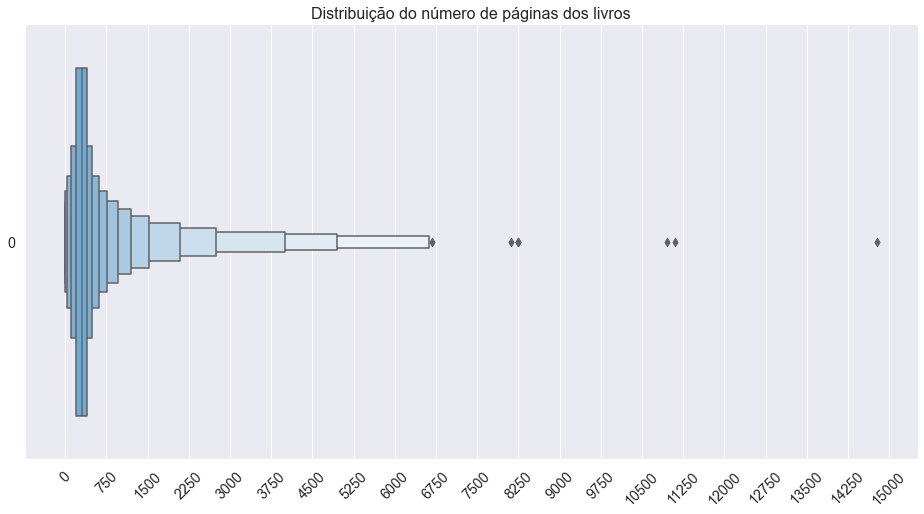

In [10]:
base_num_pages = 750
utils.plot_distribution_large_data(df['book_pages'], title='Distribuição do número de páginas dos livros', xaxis_interval=base_num_pages)

- ***Outliers*:** Mostramos a distribuição seguindo um intervalo de 750 em 750 páginas. O gráfico acima nos mostra que a partir deste valor há uma maior concentração de *outliers*. De acordo com o *boxplot*, notamos que a quantidade de livros com mais de 750 páginas é bem pequena. Levaremos isso em conta na próxima análise.

In [11]:
# Como existe um formato de livro chamado 'Unknown', optamos por atribuir este valor aos NaN values
df['book_format'] = df['book_format'].fillna('Unknown')

df_format_larger_books = df.loc[df['book_pages'] >= base_num_pages].groupby('book_format')
print('Quantidade de formatos entre os livros que possuem 750 páginas ou mais = {}'.format(len(df_format_larger_books.groups.keys())))

Quantidade de formatos entre os livros que possuem 750 páginas ou mais = 32


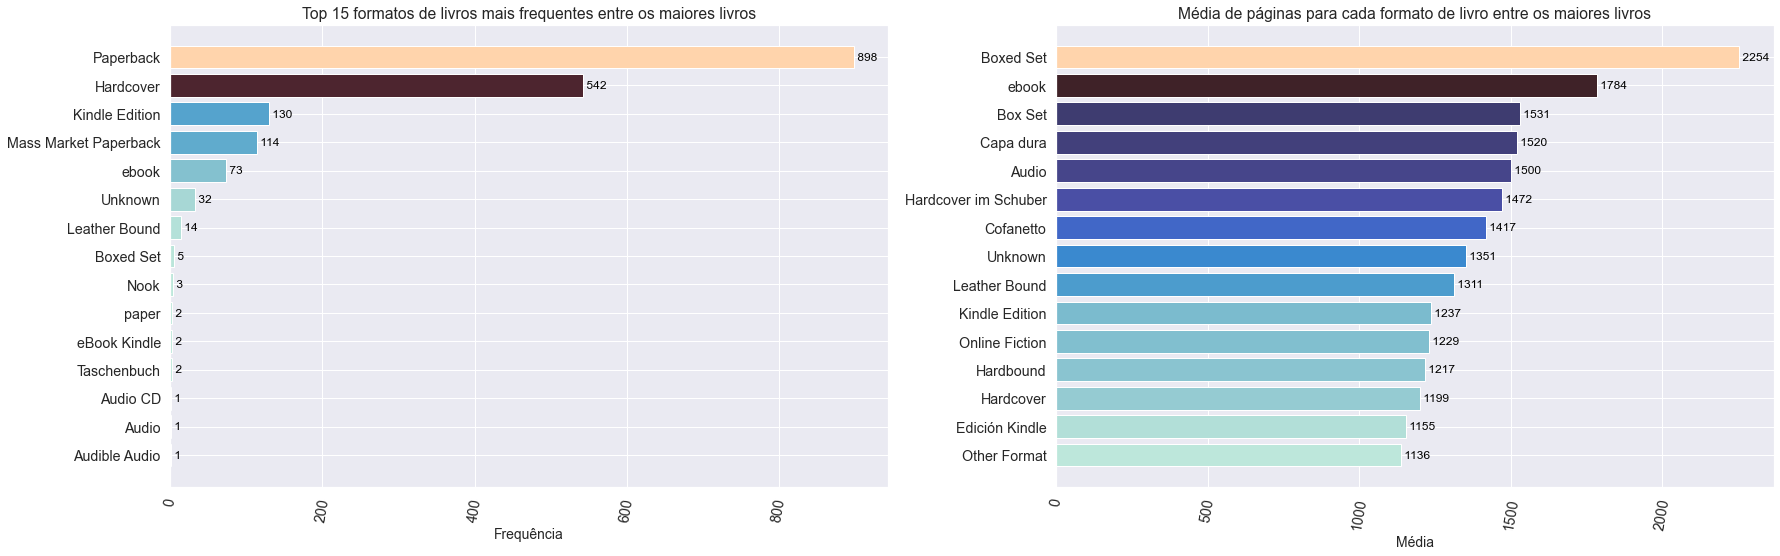

In [12]:
mean_pages_per_format = df_format_larger_books['book_pages'].agg(np.mean).sort_values(ascending=True)

plt.figure(figsize=(25, 8)) 

plt.subplot(1, 2, 1)
utils.plot_most_frequent_elements(Counter(df_format_larger_books.size().to_dict()), 
                                  15, 
                                  'Top {} formatos de livros mais frequentes entre os maiores livros'.format(15), 
                                  xlabel='Frequência')

plt.subplot(1, 2, 2)
utils.plot_most_frequent_elements(Counter(mean_pages_per_format.to_dict()), 
                                  15, 
                                  'Média de páginas para cada formato de livro entre os maiores livros', 
                                  xlabel='Média')

- **Observações:** 

> **1.** Observe que no gráfico à esquerda, *Paperback* e *Hardcover* se tratam dos formatos mais comuns. Como a maioria dos livros no *dataset* possuem esses dois formatos, isso acaba distorcendo nossa análise. Portanto, verificamos a quantidade média de páginas para cada formato (gráfico à direita), para mostrarmos uma comparação mais justa entre estas grandezas.

> **2.** Analisando o gráfico à direita, vemos que os livros com o formato *ebook* possuem a segunda maior média. Também existe um formato chamado de *Boxed Set* (maior média), que consiste em um conjunto de livros.

> **3.** Apesar de que `book_format` contém as características do formato de um livro, iremos usar esta coluna apenas aqui. Inicialmente, tentamos incluir mais análises considerando os formatos, mas acabamos tendo nenhum resultado satisfatório.

#### Os dados são multivariados?

> Também podemos verificar se as estatísticas dos nossos dados se tratam de estatísticas multivariadas. A seguir, calculamos a correlação entre os pares de atributos.

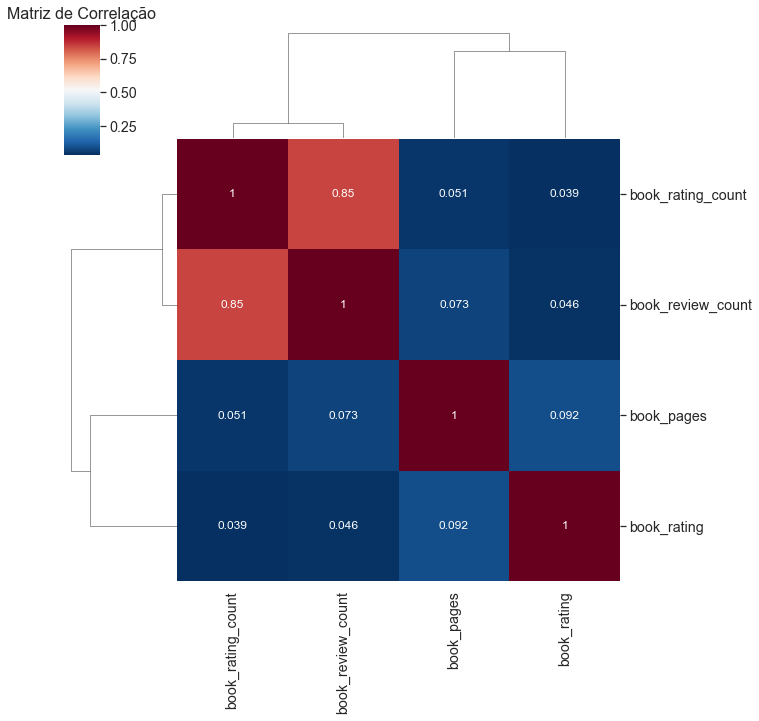

In [13]:
sns.clustermap(data=df.corr(), annot=True, cmap='RdBu_r', annot_kws={'size': 12})
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

* **Observações:**

> Avaliando a matriz de correlação acima, podemos notar que todos os atributos quantitativos possuem uma correlação positiva.

> No entanto, apenas `book_rating_count`e `book_review_count` possuem uma correlação positiva e próxima a 1, enquanto que os outros atributos possuem correlação próxima a zero, o que indica que não estão relacionados.


### Atributos Qualitativos

Temos 5 colunas com **dados qualitativos**, dispostos abaixo pela função `.describe()`. Com o `.describe()`, podemos ver a quantidade de valores únicos e de valores mais frequentes para cada uma das colunas. 





In [14]:
df.describe(include='O')

,book_authors,book_desc,book_format,book_title,genres
count,54301,52970,54301,54301,51059
unique,27159,51781,148,48483,30094
top,Stephen King,"هذه هي طبعة ""دار الفكر - بيروت"" وهي آخر طبعة ع...",Paperback,1984,Fiction
freq,112,38,28725,17,234


Notamos que nem todos os livros possuem descrições apenas em Inglês e que os valores das colunas `book_authors` e `genres` podem não ser coerentes com as estatísticas mostradas, pelos seguintes motivos: 

#### Um livro pode ter mais de um autor? Um livro possui mais de um gênero? 

> Se sim, quantos realmente são os autores e quantos realmente são os gêneros? Quais autores que publicaram mais livros e quais os gêneros mais frequentes? 

> - Na **Parte 2** das nossas análises, iremos focar bem mais nas descrições dos livros (`book_desc`) para podermos usar algumas técnicas próprias da análise de dados textuais. 


In [15]:
# Coluna genres possui 3.242 NaN values
df['genres'] = df['genres'].fillna('Unknown') # Preenchendo os NaN values com 'Unknown' -> Não faz sentido preencher com os valores mais frequentes

# Transformando os valores de book_authors e genres em vetores, já que os valores distintos estão unidos por |
df['book_authors'] = df['book_authors'].apply(lambda x: x.split('|'))
df['genres'] = df['genres'].apply(lambda x: x.split('|'))

df.head()

,book_authors,book_desc,book_format,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres
0,[Suzanne Collins],Winning will make you famous. Losing means cer...,Hardcover,374,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop..."
1,"[J.K. Rowling, Mary GrandPré]",There is a door at the end of a silent corrido...,Paperback,870,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]"
2,[Harper Lee],The unforgettable novel of a childhood in a sl...,Paperback,324,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic..."
3,"[Jane Austen, Anna Quindlen, Mrs. Oliphant, Ge...",«È cosa ormai risaputa che a uno scapolo in po...,Paperback,279,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]"
4,[Stephenie Meyer],About three things I was absolutely positive.F...,Paperback,498,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va..."


In [16]:
exploded_genres = df.explode(column='genres')
all_genres_list = exploded_genres['genres'].tolist() # Todos os gêneros

exploded_authors = df.explode(column='book_authors')
all_authors_list = exploded_authors['book_authors'].tolist() # Todos os autores

# Unique values
print('Quantidade certa de autores = {}'.format(len(set(all_authors_list))))
print('Quantidade certa de gêneros = {}'.format(len(set(all_genres_list))))

Quantidade certa de autores = 32041
Quantidade certa de gêneros = 867


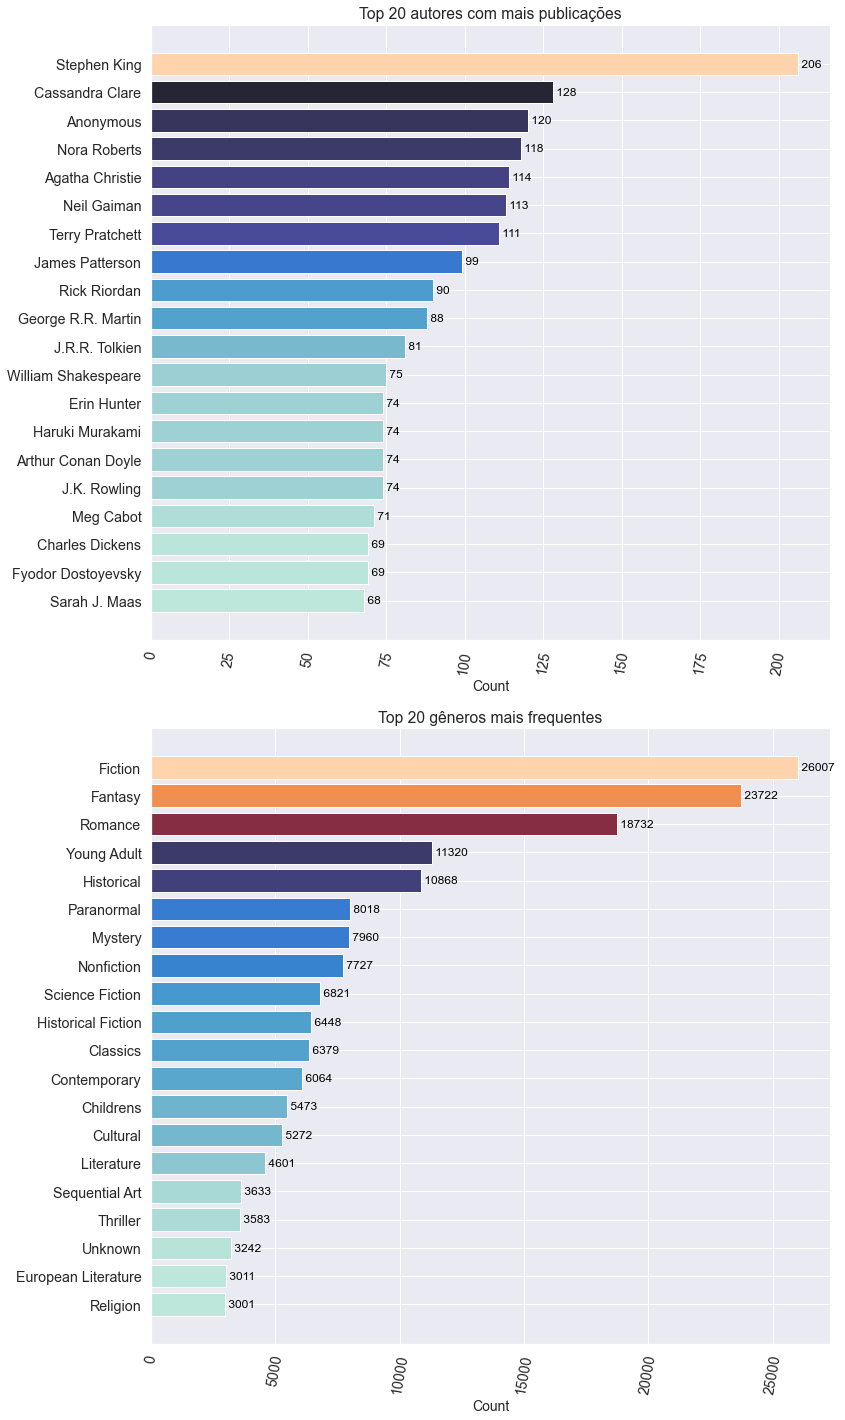

In [17]:
count_genres = Counter(all_genres_list)
count_authors = Counter(all_authors_list)

plt.figure(figsize=(12, 20))

plt.subplot(2, 1, 1)
utils.plot_most_frequent_elements(count_authors, n_most_common=20, title='Top {} autores com mais publicações'.format(20))

plt.subplot(2, 1, 2)
utils.plot_most_frequent_elements(count_genres, n_most_common=20, title='Top {} gêneros mais frequentes'.format(20))

- **Respostas:**
  
  **1.** 
    - **Um livro pode ter mais de um autor?** *Como analisado acima, sim!*
    - **Se sim, quantos realmente são os autores?** *32.041. Antes tinha dado 27.159 autores.* 
    - **Quais autores que publicaram mais livros?** *Stephen King, Cassandra Clare, Nora Roberts, Agatha Christie e Neil Gaiman estão entre o top 5 com mais de 100 livros publicados.*
  
  **2.** 
    - **Um livro possui mais de um gênero?** *Como analisado acima, sim!*
    - **Se sim, quantos realmente são os gêneros?** *867. Antes tinha dado 30.094 gêneros, o que é bastante discrepante.*
    - **Quais os gêneros mais frequentes?** *Ficção, fantasia, romance, young adults e histórico estão entre o top 5 com mais de 10.000 livros.*

## Parte 2. O Que Mais os Dados nos Dizem

### Quais os top autores e gêneros mais bem avaliados e com mais *reviews*?

Aqui, queremos avaliar se autores e gêneros possuem alguma relação quando olhamos para seus *ratings* e *reviews*.

Segundo o `.describe()` abaixo, como 50% dos livros possuem cerca de quase 3.000 *ratings*, só consideramos os valores acima do percentil de 25%. Isso evita que livros com poucas avaliações possam aparecer entre os melhores, o que seria algo enviesado. 

Optamos por um número pequeno pois assim desconsideramos apenas os que possuem poucas quantidades de avaliações. Caso contrário, por exemplo, um livro que recebeu apenas uma avaliação 5.0 pode estar entre os melhores.

In [18]:
print('Estatísticas básicas:\n', df['book_rating_count'].describe())

Estatísticas básicas:
 count    5.430100e+04
mean     4.350449e+04
std      2.126572e+05
min      0.000000e+00
25%      4.070000e+02
50%      2.811000e+03
75%      1.274500e+04
max      5.588580e+06
Name: book_rating_count, dtype: float64


In [19]:
book_rating_percentil_25 = df['book_rating_count'].describe()['25%'] 
df['book_rating_weighted'] = df['book_rating']*df['book_rating_count'].apply(lambda x: 0 if x < book_rating_percentil_25 else 1)

- **Gêneros mais bem avaliados:**

> A partir do gráfico abaixo, podemos concluir que os gêneros com mais publicações não possuem muitas avaliações e *reviews*, e nem são bem avaliados.


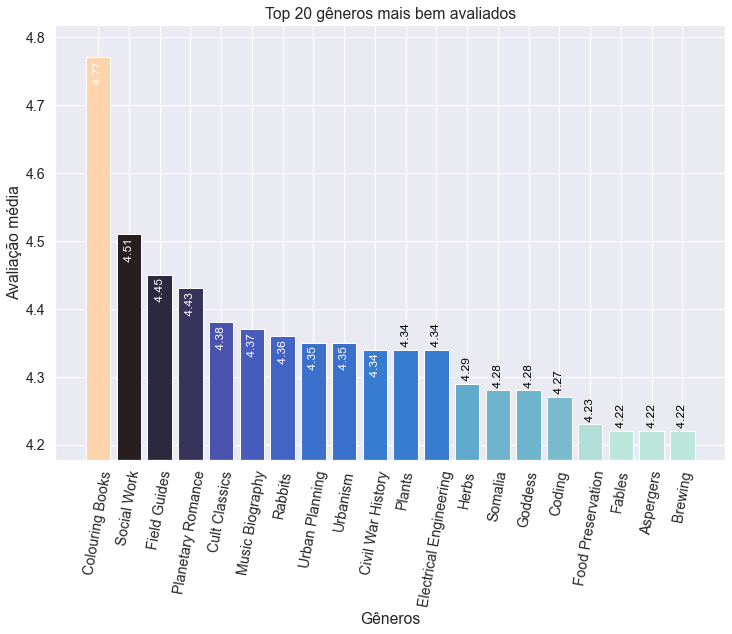

In [20]:
best_genres = df.explode('genres').groupby('genres').mean().sort_values(by=['book_rating_weighted', 'book_rating_count'], ascending=False)['book_rating_weighted']

plt.figure(figsize=(12, 8))
utils.plot_simple_bar_elements(best_genres.index.values, 
                               best_genres.values, 
                               20, 
                               'Top {} gêneros mais bem avaliados'.format(20), 
                               'Gêneros', 
                               'Avaliação média')

- **Autores com mais *reviews* e mais bem avaliados:**

> Comparando o gráfico abaixo com o gráfico de autores com maiores quantidades de publicações (previamente apresentado), podemos perceber que há uma divergência nos autores listados. 

> Os autores mais bem avaliados e com mais *reviews* **não necessariamente possuem muitos livros publicados**. A ordem só vale para os autores Stephen King e Cassandra Clare.


In [21]:
groupby_authors = df.explode('book_authors').groupby('book_authors').sum()

most_famous_authors = groupby_authors.sort_values(by=['book_rating_weighted'], ascending=False)['book_rating_weighted']
most_famous_authors_names = most_famous_authors.index.values

plt.figure(figsize=(12, 8))
utils.plot_simple_bar_elements(most_famous_authors.index.values, 
                               most_famous_authors.values, 
                               n, 
                               'Top {} autores com mais reviews e mais bem avaliados'.format(n), 
                               'Autor(a)', 
                               'Score');

NameError: name 'n' is not defined

<Figure size 864x576 with 0 Axes>

### O que podemos dizer sobre um livro lendo a sua descrição?

A coluna que contém as descrições de cada livro (`book_desc`) se trata do dado textual mais frequente no *dataset*. 

Primeiramente, iremos obter algumas estatísticas básicas sobre as descrições. Basicamente, iremos encontrar termos característicos e fazer associações entre eles.

In [ ]:
# O processamento abaixo gerou o dataset book_desc_lang.json com os idiomas das descrições de cada livro
if False:
  # Iremos explicar mais adiante porque precisamos fazer esse tratamento 
  # Colocamos essa condição porque leva em torno de 5 minutos para extrair os idiomas das descrições 
  tqdm_notebook.pandas(desc='Detectando as linguagens das descrições')
  df['book_desc_lang'] = df['book_desc'].progress_apply(lambda x: utils.detect_language(str(x)))

# Adicionando informações dos idiomas das descrições a partir do dataset pré-processado
lang_df = pd.read_json(BASE_PATH + '/Dataset/book_desc_langs.json', orient='index')
lang_df.rename(columns={0: 'book_desc_lang'}, inplace=True)
df = df.join(lang_df)

# Substituindo os NaN values por 'Unknown' (descrição desconhecida) -> Forma de substituição que fez mais sentido para gente
df['book_desc'] = df['book_desc'].fillna('Unknown')

# Tokenização simples e remoção de pontuações 
# Em lowercase para pegar as stopwords com diferentes formatos
df['book_desc_tokens'] = df['book_desc'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower().split()) 
df['book_desc_tokens_count'] = df['book_desc_tokens'].apply(lambda x: len(x)) # Quantidade de tokens de cada texto
df['genres_count'] = df['genres'].apply(lambda x: len(x)) # Quantidade de gêneros por livro

df.head()

In [22]:
desc_tokens_percentil_75 = df['book_desc_tokens_count'].describe()['75%']

print('Estatísticas básicas:\n', df['book_desc_tokens_count'].describe())
utils.plot_distribution_large_data(df['book_desc_tokens_count'], title='Distribuição do número de palavras das descrições dos livros', xaxis_interval=desc_tokens_percentil_75)

KeyError: 'book_desc_tokens_count'

- **Observações:**

> O tamanho de palavras presentes nas descrições não varia muito em até 135. Com as estatísticas e com o gráfico acima, podemos ver que temos poucas descrições que possuem um tamanho muito maior que a média.

> Esses valores talvez não estejam coerentes com algumas das descrições. No ínicio da nossa análise exploratória, notamos a presença de descrições com diferentes idiomas. Acima, como reportado, fizemos a extração de cada idioma usando o pacote [`langdetect`](https://code.google.com/archive/p/language-detection/) da Google. A seguir, plotamos um gráfico mostrando essa distribuição.



In [23]:
print('Estatísticas básicas:\n', df['book_desc_lang'].describe())

plt.figure(figsize=(14, 6))
books_per_language = df['book_desc_lang'].value_counts()

utils.plot_most_frequent_elements(Counter(books_per_language.to_dict()), 
                                  15, 
                                  'Distribuição dos top {} idiomas mais comuns'.format(15))

KeyError: 'book_desc_lang'

- **Idiomas das descrições:**

> As descrições possuem 47 idiomas distintos, sendo que quase todas as descrições estão em **Inglês**. Iremos usar apenas as que estão nesse idioma para facilitar nosso trabalho e as seguintes análises. 

> O principal motivo pelo qual iremos usar apenas um idioma, é que, para poder literalmente vermos como as palavras estão distribuídas, precisamos remover as *stopwords*: palavras mais comuns presentes em um idioma, como artigos, pronomes e preposições. Adiante, iremos mostrar um exemplo porque *stopwords* são um problema.

> Poderíamos carregar *stopwords* para todos os idiomas, mas isso seria um pouco trabalhoso e, como mostramos, a maioria dos textos estão em Inglês. Esse tratamento garante que não seja mostrado palavras (especialmente *stopwords*) de outros idiomas. 

- **Matriz de correlação para as palavras:**

> Abaixo, verificamos se existe alguma correlação com o número de palavras das descrições e com os outros atributos quantitativos. Obtemos uma correlação negativa entre `book_desc_count` e `genres_count` com `book_rating`. Apesar dela indicar que as variáveis movem-se em direções opostas, a relação entre elas não fica mais forte, pois não é próxima de -1. 

> Assim, as matrizes de correlação já analisadas nos dizem que estamos lidando com um *dataset* em que suas colunas não possuem relação entre si. O que importa realmente é entender de que forma o contexto desses atributos pode ser interligado.

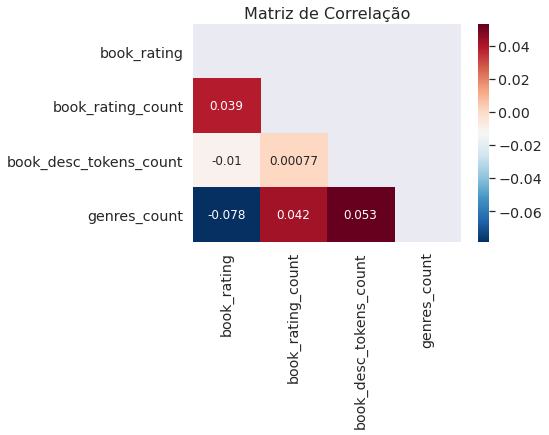

In [ ]:
correlation = df[['book_rating','book_rating_count', 'book_desc_tokens_count', 'genres_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, cmap='RdBu_r', annot=True, annot_kws={'size': 12}, mask=mask)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

#### Quais são as palavras mais comuns? E quais as mais comuns por gênero?

Aqui, vamos começar examinando quais são as palavras mais comuns das descrições e se as descrições dos livros possuem alguma relação com os seus gêneros. Para isso, usaremos nuvens de palavras. 

Nuvens de palavras (*word clouds*) são as representações visuais da frequência de diferentes palavras presentes em um texto. Isto é, ela dá importância às palavras mais frequentes e de tamanho maior em comparação com outras palavras menos frequentes.

In [ ]:
df_lang_en = df.loc[df['book_desc_lang'] == 'en']
all_desc_tokens = df_lang_en['book_desc_tokens'].explode().tolist() # Pegando todos os tokens das descrições que estão apenas em Inglês

print('Estatísticas básicas =\n', df_lang_en['book_desc_tokens'].describe())
print('\nQuantidade de palavras de todas as descrições dos livros em Inglês = {}'.format(len(all_desc_tokens)))
print('Quantidade de palavras que são stopwords = {}'.format(len([token for token in all_desc_tokens if token in LANG_EN_STOPWORDS])))

Estatísticas básicas =
 count         47345
unique        44912
top       [unknown]
freq           1331
Name: book_desc_tokens, dtype: object

Quantidade de palavras de todas as descrições dos livros em Inglês = 6558386
Quantidade de palavras que são stopwords = 3173038


In [ ]:
print('Estatísticas básicas =\n', df_lang_en['book_desc_tokens_count'].describe())
all_desc_clean_tokens = [token for token in all_desc_tokens if token not in LANG_EN_STOPWORDS]

# Palavras mais comuns
most_common_tokens = utils.make_most_common_words(all_desc_tokens, n_most_common=50)
# Palavras mais comuns e sem stopwords
most_common_clean_tokens = utils.make_most_common_words(all_desc_clean_tokens, n_most_common=50)

wc_common_tokens = utils.generate_wordcloud(dict(most_common_tokens))
wc_common_clean_tokens = utils.generate_wordcloud(dict(most_common_clean_tokens))

Estatísticas básicas =
 count    47345.000000
mean       138.523308
std         89.776092
min          1.000000
25%         82.000000
50%        130.000000
75%        179.000000
max       3571.000000
Name: book_desc_tokens_count, dtype: float64


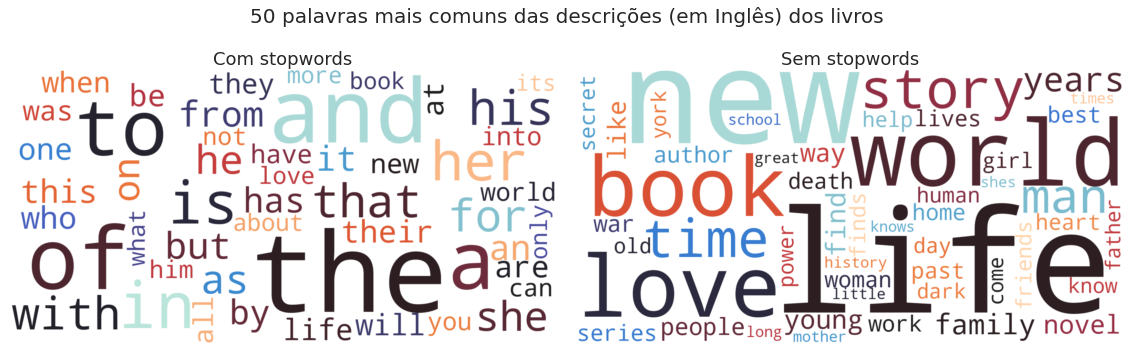

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('50 palavras mais comuns das descrições (em Inglês) dos livros', y=0.85, fontsize=20)

ax[0].imshow(wc_common_tokens, interpolation='bilinear')
ax[1].imshow(wc_common_clean_tokens, interpolation='bilinear')

ax[0].axis('off')
ax[0].set_title('Com stopwords', fontdict={'fontsize': 18})

ax[1].axis('off')
ax[1].set_title('Sem stopwords', fontdict={'fontsize': 18})
fig.tight_layout()

- **Observações:**

> Com a nuvem de palavras da esquerda, podemos ver porque é um problema não tratar *stopwords*. Quase todas as 50 palavras mais comuns são *stopwords*! Isso dificulta muito nosso trabalho, pois não conseguimos saber quais são os termos realmente importantes. 

> Agora, com a nuvem de palavras da direita, podemos realmente saber quais são as palavras mais significantes presentes nas descrições. Ainda assim, algumas palavras podem não ter relação com o contexto contato pela história dos livros, como *new* (novo) e *book* (find), que são umas das mais frequentes. 

> Como queremos saber quais são as palavras realmente significantes para cada gênero, iremos ignorar algumas dessas palavras mais comuns que não são *stopwords*.

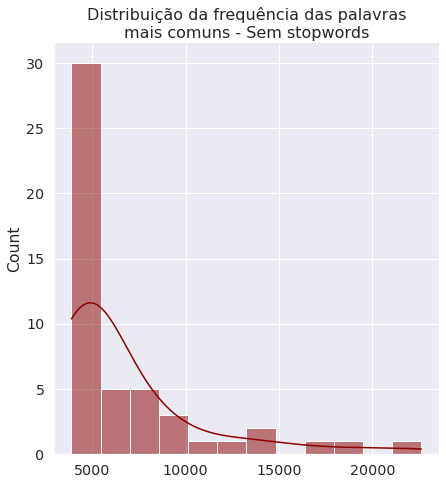

In [ ]:
sns.set(font_scale=1.3)
sns.displot(ax=ax[0], data=[tup[1] for tup in most_common_clean_tokens], kde=True, color='darkred', height=6.5)
plt.title('Distribuição da frequência das palavras\nmais comuns - Sem stopwords', fontsize=16)
plt.show()

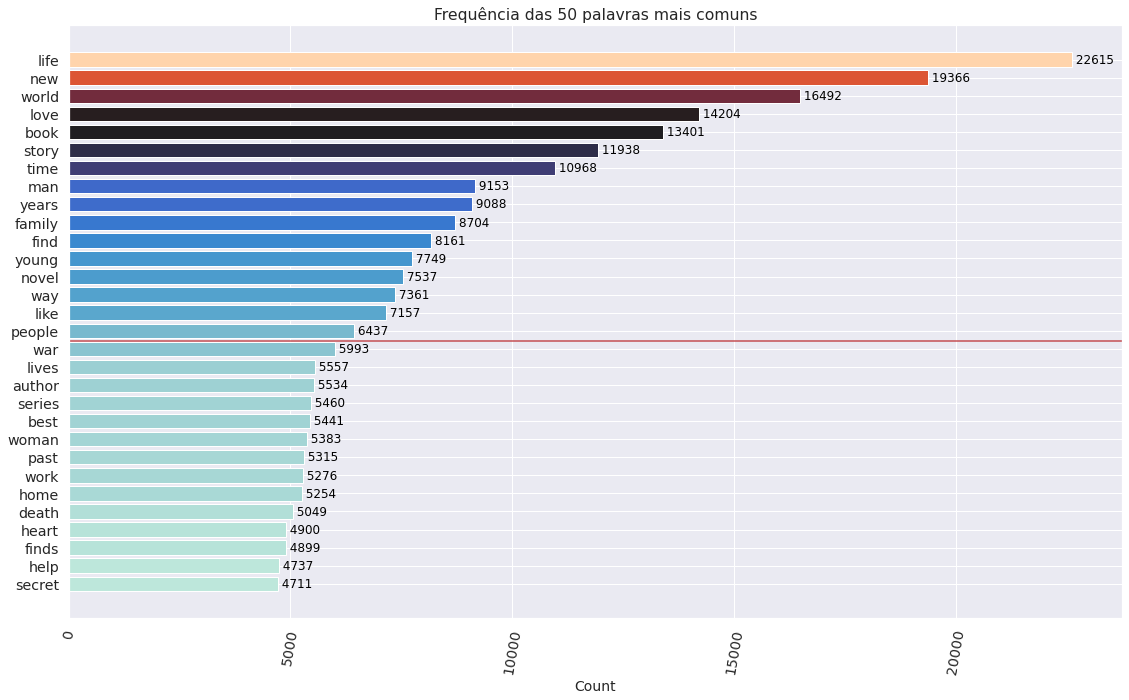

In [ ]:
plt.figure(figsize=(16, 10))
utils.plot_most_frequent_elements(Counter(dict(most_common_clean_tokens)), n_most_common=30, title='Frequência das 50 palavras mais comuns')
plt.axhline(y=13.46, color='r', linestyle='-');

- **Observações:**

> Com os gráficos acima, podemos notar que a partir de uma certa frequência as palavras não oscilam muito. Iremos usar como *threshold* o valor 6.000.

> Finalmente, podemos verificar quais são as palavras mais significativas por gênero!



[('war', 4028), ('woman', 3517), ('home', 3342), ('lives', 3295), ('past', 3148), ('finds', 3132), ('series', 3124), ('death', 3108), ('author', 3087), ('secret', 2987), ('best', 2912), ('old', 2884), ('girl', 2858), ('friends', 2737), ('father', 2723), ('heart', 2719), ('york', 2637), ('dark', 2635), ('day', 2621), ('power', 2586), ('work', 2575), ('set', 2532), ('come', 2522), ('tale', 2522), ('mother', 2480), ('knows', 2375), ('human', 2370), ('great', 2359), ('city', 2359), ('shes', 2349), ('stories', 2337), ('help', 2334), ('long', 2320), ('comes', 2307), ('school', 2287), ('friend', 2281), ('little', 2280), ('times', 2264), ('place', 2253), ('beautiful', 2228), ('know', 2225), ('men', 2152), ('readers', 2120), ('mysterious', 2116), ('soon', 2109), ('begins', 2105), ('town', 2096), ('takes', 2072), ('night', 2053), ('away', 2053)]
[('dark', 2366), ('series', 2263), ('magic', 2244), ('power', 2002), ('secret', 1785), ('evil', 1776), ('save', 1768), ('death', 1749), ('war', 1694), (

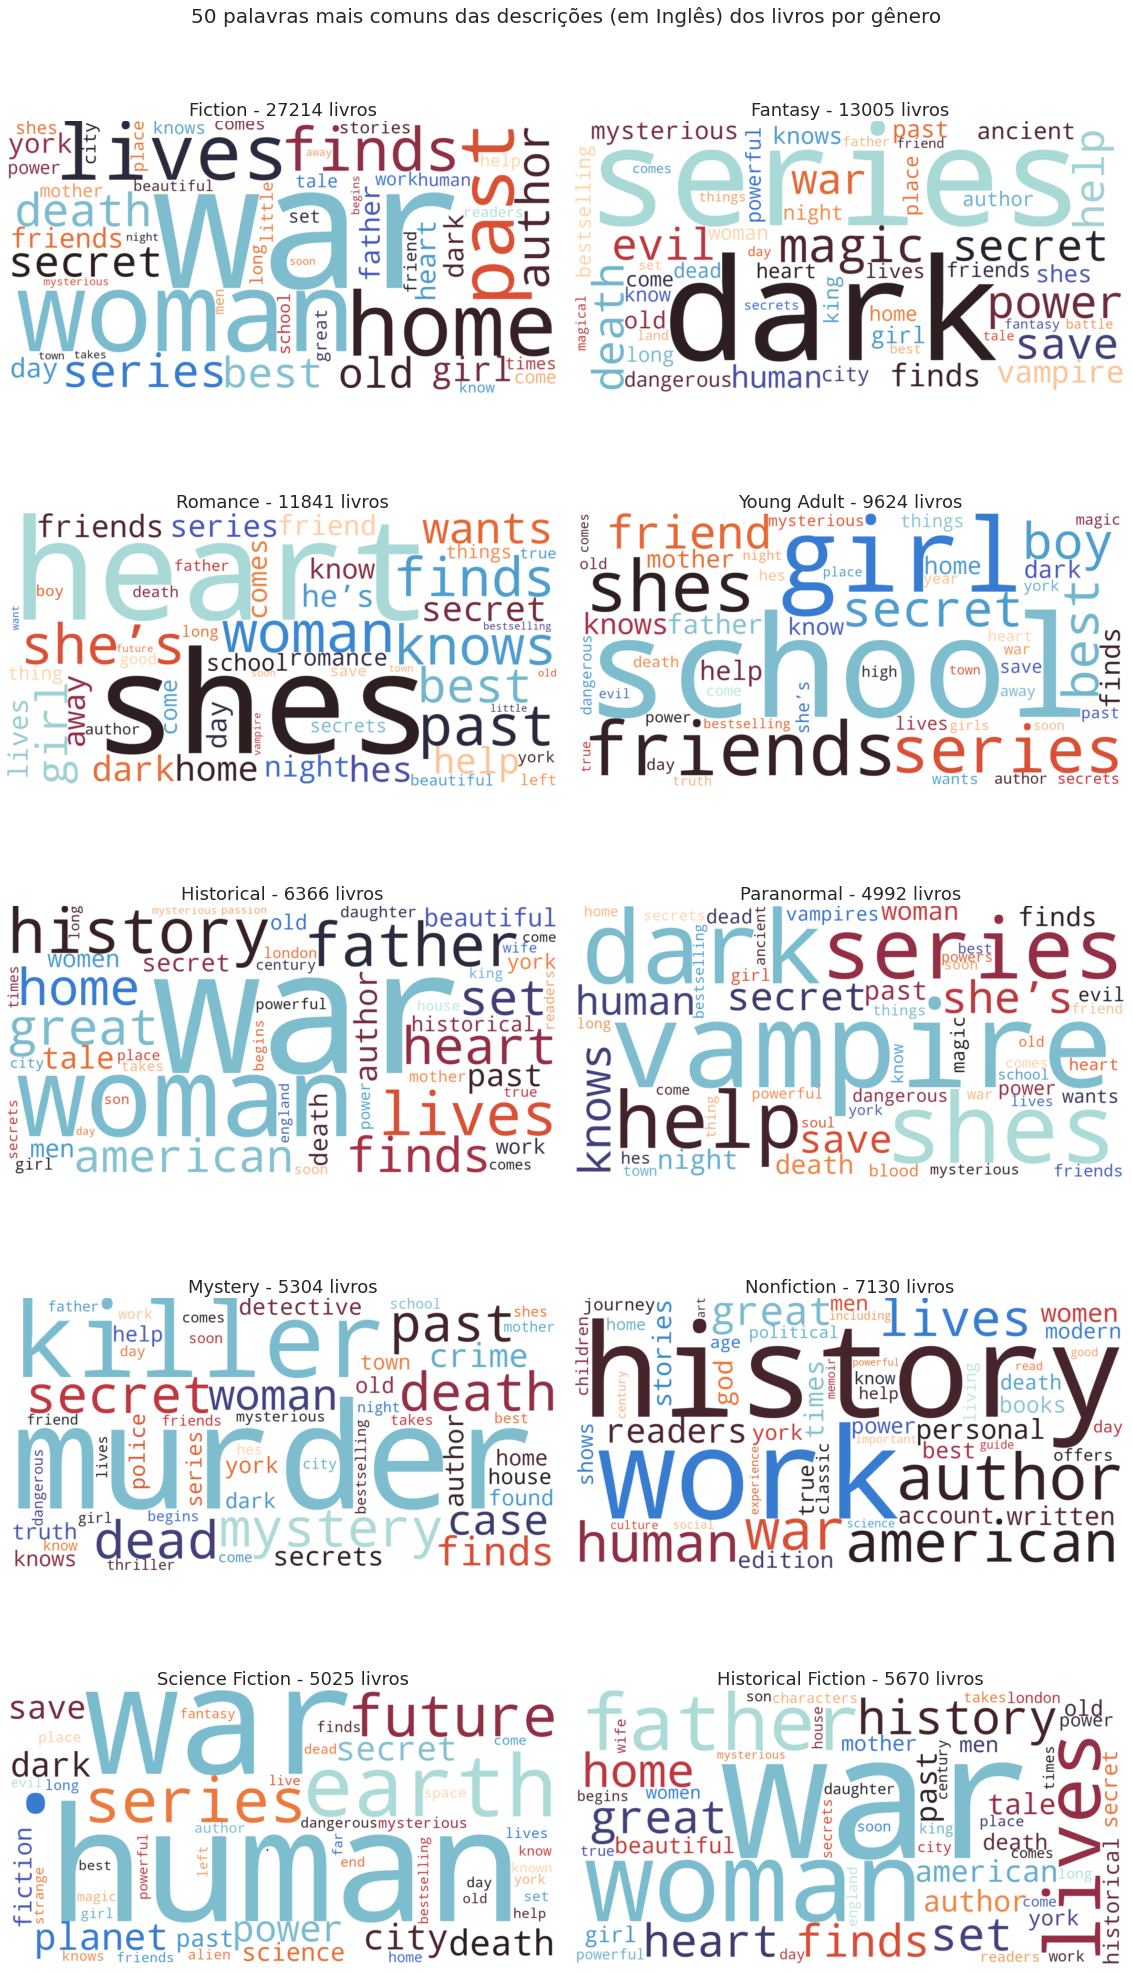

In [ ]:
# Top 10 gêneros com mais publicações -> Assim o código não fica poluído por muitas word clouds
top_10_genres = [tup[0] for tup in count_genres.most_common(10)] 
words2ignore = [tup[0] for tup in most_common_clean_tokens if tup[1] > 6000]
set_stop_words2ignore = LANG_EN_STOPWORDS.union(set(words2ignore))
word_clouds = []

for genre in top_10_genres:
  df_genre_lang_en = df_lang_en['book_desc_tokens'][df_lang_en['genres'].astype(str).str.contains(genre)]
  all_genre_desc_tokens = [word for word in df_genre_lang_en.explode().tolist() if word not in set_stop_words2ignore]
  
  genre_most_common_tokens = utils.make_most_common_words(all_genre_desc_tokens, n_most_common=50)
  wc = utils.generate_wordcloud(dict(genre_most_common_tokens))
  word_clouds.append((wc, '{} - {} livros'.format(genre, len(df_genre_lang_en))))
  all_genre_desc_tokens = []

utils.subplot_topic_wordcloud(word_clouds, 
                              nrows=5, 
                              ncols=2, 
                              width=16, 
                              height=30, 
                              title='50 palavras mais comuns das descrições (em Inglês) dos livros por gênero', 
                              range_stop=10, 
                              range_step=2) 

- **Nuvens de palavras por gênero:**

> As palavras mais comuns para os 10 gêneros com mais publicações realmente fazem sentido! Segue uma revisãozinha:
>>
  1. **Ficção** (*Fiction*): palavras mais destacadas são *war*, *woman* e *home*. Ficção pode ter qualquer coisa, certo?
  2. **Fantasia** (*Fantasy*): *series*, *dark*, *magic*, *evil* e *secret* estão entre as mais frequentes. O que seria uma fantasia sem magia negra, não é mesmo?
  3. **Romance**: *heart*,  *she's*, *wants*, *finds*, são as palavras que se destacam. Pelo visto, romances possuem aspectos de querer encontrar o seu coração.
  4. ***Young Adult***: *school*, *girl* e *boy*, o típico romance adolescente. 
  5. **Histórico** (*Historical*): palavras que chamam mais atenção são *war*, *woman*, *lives*, *father* e *history*.
  6. **Paranormal**: agora sabemos que a maioria desses livros paranormais tem vampiros e segredos.
  7. **Mistério** (*Mistery*): *murder*, *killer*, *death*, *past*, *secret* e *mistery*, ou seja, muitas investigações de assassinatos misteriosos e segredos do passado. 
  8. **Não-ficção** (*Nonfiction*): o genêro da realidade, fala sobre história, trabalho, política, etc. 
  9. **Ficção Científica** (*Science Fiction*): as palavras mais destacadas de acordo com o gênero são *earth*, *war*, *human*, *future*, *power*, etc., além do  símbolo • , que aparece 755 vezes. Interpretamos que talvez ele seja o número 42 dos ETs, ou seja, o significado da Vida, do Universo e Tudo o Mais.
  10. **Ficção História** (*Historical Fiction*): as palavras mais destacadas de acordo com o gênero são *secret*, *war*, *woman*, *lives*, *history*, etc. 


### Um livro pode ser julgado pelas cores da capa? 

O *dataset* utilizado neste trabalho possui, além dos dados numéricos e textuais, um conjunto de imagens das capas de cada livro. Então, queremos saber quais são as cores mais predominantes em capas de livros de determinados gêneros. Esse conjunto é bem completo, com apenas 824 imagens faltantes em comparação ao total de 50.300.

Diante disso, foi realizado um processamento nas imagens disponibilizadas, no qual extraiu-se a cor predominante de cada imagem de capa e gerou-se o dataset `dominant_colors.json`, relacionando o índice do livro à cor de sua capa.

Com a união deste *dataset* de cores e o conjunto de dados original, conseguimos elencar quais as cores mais frequentes por gênero, considerando os mais relevantes. Como a diferença entre os gêneros não foi expressiva, decidimos escolher somente as cores das capas dos top `n` livros com melhores avaliações de cada gênero, porém, o resultado foi praticamente o mesmo :(

> `n =` indica a quantidade de livros do gênero mais comum com menos publicações (vulgo, Religião).

In [ ]:
color_df = pd.read_json(BASE_PATH + '/Dataset/dominant_colors.json', orient='index')
color_df.rename(columns = {0: 'color1', 1: 'color2', 2: 'color3'}, inplace = True)

full_df = df.join(color_df)

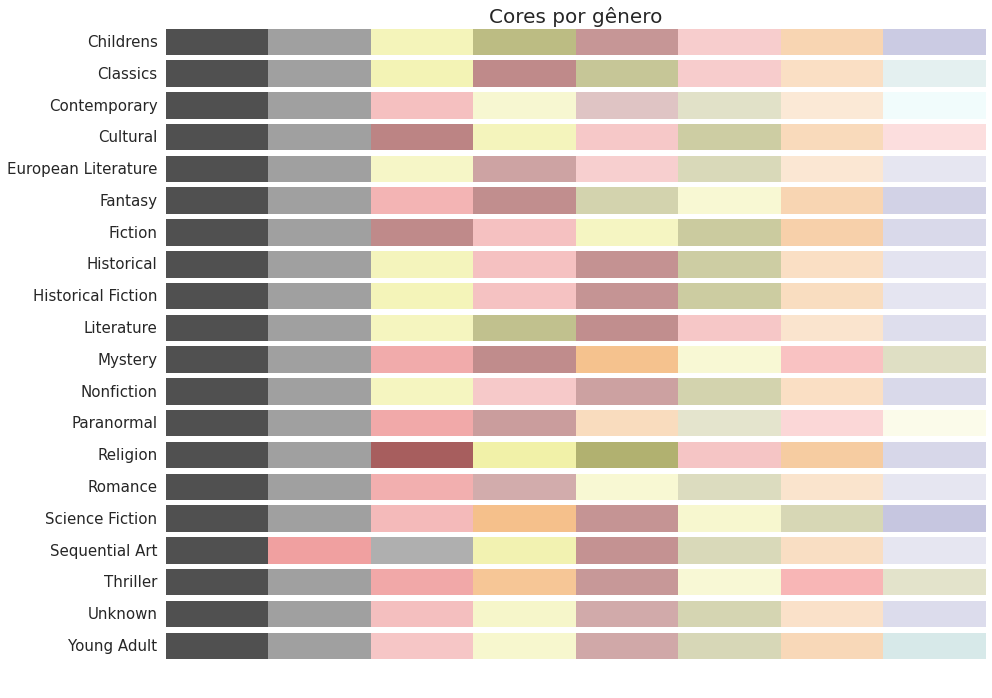

In [43]:
min_rating = 4

most_common_genres = [genre for genre, _ in count_genres.most_common(20)]

colors_by_genre = utils.group_colors_by_genre(full_df, min_rating, most_common_genres)

genres_colormaps = utils.generate_colormaps(colors_by_genre)

utils.plot_color_gradients('Cores por gênero', genres_colormaps)

# Conclusões

1. Em relação aos gêneros dos livros, pôde-se concluir que os três gêneros mais frequentes são, em ordem, **Ficção**, **Fantasia** e **Romance**; e os três mais bem avaliados são, em ordem, **Colouring Books**, ***Social Work*** e ***Field Guide***. 

2. Em relação aos próprios livros, observou-se que a grande maioria destes tem **menos do que 1.000 páginas** e que os que concentram a maior quantidade de páginas são dos formatos **Boxed Set** e **ebook**.  Além disso, três dos formatos mais comuns são, em ordem, **Paperback**, **Hardcover** e **Kindle Edition**. Sobre os idiomas, **87% dos livros estão em Inglês**, seguido por **Espanhol (1.8%)** e **Árabe (1.6%)**.

3. Partindo para os autores, analisando a quantidade de publicações, o *ranking* neste aspecto é composto por **Stephen King**, **Cassandra Clare** e **Autores Anônimos**. Uma dificuldade encontrada foi mensurar a "fama" de um autor, mas, no fim, foi calculada considerando a **quantidade de avalições em todos os livros publicados e as notas atribuídas a eles**. A partir disso, concluiu-se que **autores com mais livros não são, necessariamente, os mais famosos**.

4. Uma análise posterior foi realizada nos textos das descrições. Primeiramente, foi possível notar a **inexistência de correlação entre a quantidade de palavras das descrições e os demais atributos disponíveis**. Além disso, considerando os gêneros, **existem palavras que são mais comuns nas descrições de todos eles, como *new*, *life*, *world*, etc**. Para uma análise mais particular das palavras mais significantes de cada gênero, ignorou-se as palavras mais comuns que possuiam ocorrência maior que 6.000. Com isso, no gênero Mistério, por exemplo, obtiveram-se as palavras ***secret*, *killer* e *murder* com as maiores frequências**.

5. Por fim, procurou-se avaliar também a relação entre as cores predominantes nas capas dos livros e os seus gêneros. No entanto, **essa correlação não é tão expressiva quanto se gostaria** e, no geral, **as cores tendem as ser bem distribuídas entre os diferentes gêneros com mais publicações**.